## Task1: Direct Linear Transform (DLT)<br />

### A. Estimate Camera Projection (P) Matrix. <br/> B. Estimate the reprojection error (i.e. the error between where your world points map to in the image according to your estimated Projection Matrix, and where the world points actually map to) <br/> C. Estimate the Camera Intrinsic Matrix(K), RotationMatrix(R) and ProjectionCenter(C). <br/> D. Find out where your world points map to in the image according to the projection.

In [ ]:
'''
Step 1. Select 20 coordinates on the 2 planes (10 each) of image - calib-object.jpg
Step 2. Find 3D coordinates of the chessboard corners in your assumed 3D world frame (assumed during calibration).
Step 3. Estimate P and Reprojection Error using DLT.
'''

First, let's install all the requirements:
* `import cv2`: This is the computer vision library that enables us to perform image manipulation tasks.
* `import math`: This library that enables us to perform numerical manipulation tasks such as square_root.
* `import numpy as np`: Numpy is a python library that enables us to perform numerical computations with ease in python; "**np**" is the alias used for numpy.
* `import matplotlib.pyplot as plt`: Matplotlib enables to create inline plots to visualize our results.


In [1]:
# Import libraries
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

**Step 1: Select 20 coordinates on the 2 planes (10 each) of image - calib-object.jpg**

![alt](https://i.ibb.co/xMkgYVc/a.png)

In [ ]:
'''
The following block of code helps us in coordinate selection on "calib-object.jpg" image.
My selected coordinates (10 in each plane are displayed in the picture above. Yellow dots are the selected points)
The 2D coordinates are displayed on the terminal corresponding to every mouseclick-event.
'''

img = cv2.imread("../images/Section-1/calib-object.jpg")

# function to display the coordinates of of the points clicked on the image
def click_event(event, x, y, flags, params):
   if event == cv2.EVENT_LBUTTONDOWN:
      print(f'({x},{y})')
      
      # draw point on the image
      cv2.circle(img, (x,y), 18, (0,255,255), -1)

# create a window
cv2.namedWindow('Point Coordinates')

# bind the callback function to window
cv2.setMouseCallback('Point Coordinates', click_event)

# display the image
while True:
   cv2.imshow('Point Coordinates',img)
   k = cv2.waitKey(1) & 0xFF
   if k == 27:
      break
cv2.destroyAllWindows()

#### Step 2: Find 3D coordinates of the chessboard corners in your assumed 3D world frame (assumed during calibration).
Coordinates clicked on Left Plane of the image:
`[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1294,2492], [1426,2605], [1302,2812], [1167,3024], [1041,3240]` <br />
Coordinates clicked on RIght Plane of the image:
`[2618,1742], [2414,1927], [2230,2087], [2063,2238], [1923,2373], [1786,2494], [1658,2606], [1784,2815], [1910,3032], [2039,3259]`

Assumed 3D world coords corresponding to selected image points (Considering the **right hand rule convention** i.e. Red: X, Green: -Y (negative Y), Blue: Z) <br /> 
Corresponding points on left plane: `[0,0,7], [0,-1,6], [0,-2,5], [0,-3,4], [0,-4,3], [0,-5,2], [0,-6,1], [0,-7,2], [0,-8,3], [0,-9,4]` <br />
Corressponding points on right plane: `[7,0,0], [6,-1,0], [5,-2,0], [4,-3,0], [3,-4,0], [2,-5,0], [1,-6,0], [2,-7,0], [3,-8,0], [4,-9,0]` <br />

In [2]:
# Based on the experiment, I am performing, I set the flags to 1,2,3,4,5,6.
exp_flag = 0 # 0 indicates that use the default params and not the specific params given in experiments.

In [3]:
# Step 3. Estimate P using DLT.

def Estimate_P_and_Error(exp_flag):
    '''
    Camera calibration by DLT using pre-computed world coordinates and their 2D image coordinates.
    
    Output: 
    P (array of 11 parameters of the calibration matrix), 
    P_err: error of the DLT (mean residual of the DLT transformation in units of camera coordinates).
    '''

    if exp_flag == 1:
        d1, d2 = 28, 28 # d1=width, d2=height are dimensions for a chessblock
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [0,-3*d2,4*d1], [0,-4*d2,3*d1], [0,-5*d2,2*d1], [0,-6*d2,1*d1], [0,-7*d2,2*d1], [0,-8*d2,3*d1], [0,-9*d2,4*d1], [7*d1,0,0], [6*d1,-1*d2,0], [5*d1,-2*d2,0], [4*d1,-3*d2,0], [3*d1,-4*d2,0], [2*d1,-5*d2,0], [1*d1,-6*d2,0], [2*d1,-7*d2,0], [3*d1,-8*d2,0], [4*d1,-9*d2,0]]
        uv = [[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1294,2492], [1426,2605], [1302,2812], [1167,3024], [1041,3240], [2618,1742], [2414,1927], [2230,2087], [2063,2238], [1923,2373], [1786,2494], [1658,2606], [1784,2815], [1910,3032], [2039,3259]]
    elif exp_flag == 2:
        d1, d2 = 2800, 2800
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [0,-3*d2,4*d1], [0,-4*d2,3*d1], [0,-5*d2,2*d1], [0,-6*d2,1*d1], [0,-7*d2,2*d1], [0,-8*d2,3*d1], [0,-9*d2,4*d1], [7*d1,0,0], [6*d1,-1*d2,0], [5*d1,-2*d2,0], [4*d1,-3*d2,0], [3*d1,-4*d2,0], [2*d1,-5*d2,0], [1*d1,-6*d2,0], [2*d1,-7*d2,0], [3*d1,-8*d2,0], [4*d1,-9*d2,0]]
        uv = [[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1294,2492], [1426,2605], [1302,2812], [1167,3024], [1041,3240], [2618,1742], [2414,1927], [2230,2087], [2063,2238], [1923,2373], [1786,2494], [1658,2606], [1784,2815], [1910,3032], [2039,3259]]
    elif exp_flag == 3:
        d1, d2 = 28, 56
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [0,-3*d2,4*d1], [0,-4*d2,3*d1], [0,-5*d2,2*d1], [0,-6*d2,1*d1], [0,-7*d2,2*d1], [0,-8*d2,3*d1], [0,-9*d2,4*d1], [7*d1,0,0], [6*d1,-1*d2,0], [5*d1,-2*d2,0], [4*d1,-3*d2,0], [3*d1,-4*d2,0], [2*d1,-5*d2,0], [1*d1,-6*d2,0], [2*d1,-7*d2,0], [3*d1,-8*d2,0], [4*d1,-9*d2,0]]
        uv = [[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1294,2492], [1426,2605], [1302,2812], [1167,3024], [1041,3240], [2618,1742], [2414,1927], [2230,2087], [2063,2238], [1923,2373], [1786,2494], [1658,2606], [1784,2815], [1910,3032], [2039,3259]]
    elif exp_flag == 4:
        d1, d2 = 28, 28
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [0,-3*d2,4*d1], [0,-4*d2,3*d1], [2*d1,-5*d2,0], [1*d1,-6*d2,0], [2*d1,-7*d2,0], [3*d1,-8*d2,0], [4*d1,-9*d2,0]]
        uv = [[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1786,2494], [1658,2606], [1784,2815], [1910,3032], [2039,3259]]
    elif exp_flag == 5:
        d1, d2 = 28, 28
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [2*d1,-7*d2,0], [3*d1,-8*d2,0], [4*d1,-9*d2,0]]
        uv = [[435,1735], [634,1915], [826,2080], [1784,2815], [1910,3032], [2039,3259]]
    elif exp_flag == 6:
        d1, d2 = 28, 28
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [0,-3*d2,4*d1], [0,-4*d2,3*d1], [0,-5*d2,2*d1], [0,-6*d2,1*d1], [0,-7*d2,2*d1], [0,-8*d2,3*d1], [0,-9*d2,4*d1]]
        uv = [[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1294,2492], [1426,2605], [1302,2812], [1167,3024], [1041,3240]]
    else:
        # Known 3D coordinates
        d1, d2 = 1, 1
        xyz = [[0,0,7*d1], [0,-1*d2,6*d1], [0,-2*d2,5*d1], [0,-3*d2,4*d1], [0,-4*d2,3*d1], [0,-5*d2,2*d1], [0,-6*d2,1*d1], [0,-7*d2,2*d1], [0,-8*d2,3*d1], [0,-9*d2,4*d1], [7*d1,0,0], [6*d1,-1*d2,0], [5*d1,-2*d2,0], [4*d1,-3*d2,0], [3*d1,-4*d2,0], [2*d1,-5*d2,0], [1*d1,-6*d2,0], [2*d1,-7*d2,0], [3*d1,-8*d2,0], [4*d1,-9*d2,0]]
        uv = [[435,1735], [634,1915], [826,2080], [994,2228], [1151,2367], [1294,2492], [1426,2605], [1302,2812], [1167,3024], [1041,3240], [2618,1742], [2414,1927], [2230,2087], [2063,2238], [1923,2373], [1786,2494], [1658,2606], [1784,2815], [1910,3032], [2039,3259]]

    # Convert variables to numpy array
    xyz = np.asarray(xyz)
    uv = np.asarray(uv)
    n = xyz.shape[0]

    proj_eq = []
    for i in range(n):
        x, y, z = xyz[i, 0], xyz[i, 1], xyz[i, 2]
        u, v = uv[i, 0], uv[i, 1]
        proj_eq.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
        proj_eq.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )
    
    proj_eq = np.asarray(proj_eq)
    
    U, S, V = np.linalg.svd(proj_eq) # Find the 11 parameters # SVD decomposition of A
    P = V[-1, :] / V[-1, -1] # normalize
    P = P.reshape(3, 3 + 1)

    # Mean error of the DLT (mean residual of the DLT transformation in units of camera coordinates):
    uv2 = np.dot( P, np.concatenate( (xyz.T, np.ones((1, xyz.shape[0]))) ) ) 
    uv2 = uv2 / uv2[2, :] 
    # Mean distance:
    err = np.sqrt( np.mean(np.sum( (uv2[0:2, :].T - uv)**2, 1)) ) 

    print('Projection Matrix')
    print(P)
    print("-"*10)
    print('Reprojection Error')
    print(err)
    print("-"*10)

    return P, err    

In [4]:
# P: Projection Matrix
# P_err: Reprojection Error
P, P_err = Estimate_P_and_Error(exp_flag)

Projection Matrix
[[ 6.92128104e+01 -1.80087604e+01 -1.71128368e+02  1.53844058e+03]
 [-3.50701135e+01 -1.89511495e+02 -3.19460013e+01  1.59318622e+03]
 [-3.23395171e-02 -1.09524986e-02 -3.01073462e-02  1.00000000e+00]]
----------
Reprojection Error
3.046782394898573
----------


### C. Estimate the Camera Intrinsic Matrix (K), Rotation Matrix (R) and Projection Center(C)

In [5]:
''' 
We know M.M_T = K.K_T (where M_T is M transpose; K_T is K transpose; and K is the camera intrinsic matrix).
Step 1. Let's create an array M and M_T
Step 2. Take their dot product
Step 3. Get the useful paramaeters from the equation M.M_T = K.K_T
Step 4. Obtain K (3x3)
Step 5. Obtain R (R can be obtained by taking dot product of K_inverse and M)
'''

def camera_params(P):
    ''' 
    Calculate camera parameters K, R, C by decomposing P 
    Input: Projection Matrix P
    Output: K, R, C
    '''
    # Step 1:
    M = []
    for i in range(3):
        M.append([])
        for j in range(3):
            M[i].append(P[i][j])
    M = np.array(M)
    # print("M\n",M)

    M_T = M.transpose()
    # print("M_T\n", M_T)

    # Step 2:
    m_dot = np.dot(M,M_T)
    # print("m_dot\n", m_dot)

    # Step 3:
    # K is a 3x3 matrix. To get K, we need alpha, gamma, u_0, beta, v_0
    u_0 = m_dot[0][2]
    v_0 = m_dot[1][2]
    C = (u_0, v_0)
    # print("Projection center: ", (u_0, v_0)) # projection center (u_0, v_0)

    beta = math.sqrt(m_dot[1][1] - v_0**2) # solve for beta (m_dot[1][1] = beta*beta + v_0*v_0)
    # print("beta: ", beta)

    gamma = (m_dot[0][1] - u_0*v_0) / beta # solve for gamma
    # print("gamma: ", gamma)

    alpha = math.sqrt(m_dot[0][0] - u_0**2 - gamma**2) 
    # print("alpha:", alpha)

    # Step 4:
    K = np.array([[alpha, gamma, u_0], [0, beta, v_0], [0, 0, 1]])
    # print("K:\n", K)

    # Step 5:
    R = np.dot(np.linalg.inv(K), M)

    print("K: \n", K)
    print("-"*10)
    print("R: \n", R)
    print("-"*10)
    print("C: \n", C)
    print("-"*10)

    return K, R, C

In [6]:
K, R, C = camera_params(P)

K: 
 [[182.49100218  32.96970872   3.11115308]
 [  0.         195.31427081   4.17158423]
 [  0.           0.           1.        ]]
----------
R: 
 [[ 0.41213322  0.07675876 -0.90778891]
 [-0.17886664 -0.97005613 -0.162919  ]
 [-0.03233952 -0.0109525  -0.03010735]]
----------
C: 
 (3.1111530751797107, 4.1715842332253485)
----------


### D. Find out where your world points map to in the image according to the projection matrix (P) you obtained above and, compute a wireframe of the object by drawing straight lines between the computed points xi and overlay this wireframe on the image.

In [7]:
# wireframe function

def plot_wireframe(p_left, p_right, image, exp_flag):
    '''
    Input:
    p_left: List of image coordinates of left plane 
    p_right: List of image coordinate of right plane
    image: on which wireframe has to be plotted

    Output: Image with wireframe
    '''
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw line on LEFT PLANE VERTICAL LINE
    p_left_vert = []
    p_left_reshape = np.reshape(p_left, (10,8,2))
    for col in range(8): # re-arranging coords to draw a vertical line
        for row in range(10):
            p_left_vert.append(p_left_reshape[row][col])

    for point in p_left_vert:   
        if math.isnan(point[0]) == True:
            print("This value is: ", point)
            print("The code ends in an error because all points are in the same plane!")
            break
        else: 
            img = cv2.circle(img, ((int(point[0]), int(point[1]))), 5, (255,0,0), 33) # Plotting image points on the image
        
    count = 0
    for idx, point in enumerate(p_left_vert[:-1]):
        if count in [9,19,29,39,49,59,69,79,89]:
            count = count+ 1
            continue
        else:
            img = cv2.line(img, (int(p_left_vert[count][0]), int(p_left_vert[count][1])), (int(p_left_vert[count+1][0]), int(p_left_vert[count+1][1])), (0,255,255), 10)
        count = count+ 1

    # Draw line on LEFT PLANE HORIZONTAL LINE
    p_left_horiz = []
    for row in range(10): # re-arranging coords to draw a horizontal line
        for col in range(8):
            p_left_horiz.append(p_left_reshape[row][col])
    
    count = 0
    for idx, point in enumerate(p_left[:-1]):
        if count in [7,15,23,31,39,47,55,63,71]:
            count = count+ 1
            continue
        else:
            img = cv2.line(img, (int(p_left_horiz[count][0]), int(p_left_horiz[count][1])), (int(p_left_horiz[count+1][0]), int(p_left_horiz[count+1][1])), (0,255,255), 10)
        count = count+ 1

    #################################################################################################################################################

    # RIGHT PLANE VERTICAL LINE
    p_right_vert = []
    p_right_reshape = np.reshape(p_right, (10,8,2))

    for col in range(8): # re-arranging coords to draw a vertical line
        for row in range(10):
            p_right_vert.append(p_right_reshape[row][col])

    for point in p_right_vert:
        img = cv2.circle(img, ((int(point[0]), int(point[1]))), 5, (255,0,0), 33) # Plotting image points on the image

    count = 0
    for idx, point in enumerate(p_right_vert[:-1]):
        if count in [9,19,29,39,49,59,69,79,89]:
            count = count+ 1
            continue
        else:
            img = cv2.line(img, (int(p_right_vert[count][0]), int(p_right_vert[count][1])), (int(p_right_vert[count+1][0]), int(p_right_vert[count+1][1])), (0,255,255), 10)
        count = count+ 1
    
    # RIGHT PLANE HORIZONTAL LINE
    p_right_horiz = []
    for row in range(10): # re-arranging coords to draw a horizontal line
        for col in range(8):
            p_right_horiz.append(p_right_reshape[row][col])

    count = 0
    for idx, point in enumerate(p_right_horiz[:-1]):
        if count in [7,15,23,31,39,47,55,63,71]:
            count = count+ 1
            continue
        else:
            img = cv2.line(img, (int(p_right_horiz[count][0]), int(p_right_horiz[count][1])), (int(p_right_horiz[count+1][0]), int(p_right_horiz[count+1][1])), (0,255,255), 10)
        count = count+ 1

    # cv2.imwrite("cal_res.jpg", img)
    if (exp_flag == 1):
        plt.title("Exp 1")
    elif (exp_flag == 2):
        plt.title("Exp 2")
    elif (exp_flag == 3):
        plt.title("Exp 3")
    elif (exp_flag == 4):
        plt.title("Exp 4")
    elif (exp_flag == 5):
        plt.title("Exp 5")
    elif (exp_flag == 6):
        plt.title("Exp 6")

    img_ = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if exp_flag == 0:
        cv2.imwrite("../results/1_DLT/wireframe_exp0.jpg", img_)
    if exp_flag == 1:
        cv2.imwrite("../results/1_DLT/wireframe_exp1.jpg", img_)
    if exp_flag == 2:
        cv2.imwrite("../results/1_DLT/wireframe_exp2.jpg", img_)
    if exp_flag == 3:
        cv2.imwrite("../results/1_DLT/wireframe_exp3.jpg", img_)
    if exp_flag == 4:
        cv2.imwrite("../results/1_DLT/wireframe_exp4.jpg", img_)
    if exp_flag == 5:
        cv2.imwrite("../results/1_DLT/wireframe_exp5.jpg", img_)
    if exp_flag == 7:
        cv2.imwrite("../results/1_DLT/wireframe_ransac.jpg", img_)
    plt.imshow(img), plt.grid(False), plt.axis('off'), plt.show()

In [8]:
def new_img_points(left_plane_world_coords, right_plane_world_coords, P):
    '''
    Compute the 2D image points from newly generated 3D world points.
    
    Input: 
    World coordinates for left and right plane, 
    Projection Matrix (P)
    
    Output: image coordinates for left and right plane
    '''
    u = 0
    v = 0
    left_plane_uv_coords = []
    right_plane_uv_coords = []
    
    left_plane_world_coords = np.array(left_plane_world_coords)
    for i in range(len(left_plane_world_coords)): 
        numr = P[0][0]*left_plane_world_coords[i][0] + P[0][1]*left_plane_world_coords[i][1] + P[0][2]*left_plane_world_coords[i][2] + P[0][3]
        denom = P[2][0]*left_plane_world_coords[i][0] + P[2][1]*left_plane_world_coords[i][1] + P[2][2]*left_plane_world_coords[i][2] + P[2][3]
        u = numr/denom
    
        numr = P[1][0]*left_plane_world_coords[i][0] + P[1][1]*left_plane_world_coords[i][1] + P[1][2]*left_plane_world_coords[i][2] + P[1][3]
        denom = P[2][0]*left_plane_world_coords[i][0] + P[2][1]*left_plane_world_coords[i][1] + P[2][2]*left_plane_world_coords[i][2] + P[2][3]
        v = numr/denom

        left_plane_uv_coords.append([u,v])

    right_plane_world_coords = np.array(right_plane_world_coords)
    for i in range(len(right_plane_world_coords)): 
        numr = P[0][0]*right_plane_world_coords[i][0] + P[0][1]*right_plane_world_coords[i][1] + P[0][2]*right_plane_world_coords[i][2] + P[0][3]
        denom = P[2][0]*right_plane_world_coords[i][0] + P[2][1]*right_plane_world_coords[i][1] + P[2][2]*right_plane_world_coords[i][2] + P[2][3]
        u = numr/denom

        numr = P[1][0]*right_plane_world_coords[i][0] + P[1][1]*right_plane_world_coords[i][1] + P[1][2]*right_plane_world_coords[i][2] + P[1][3]
        denom = P[2][0]*right_plane_world_coords[i][0] + P[2][1]*right_plane_world_coords[i][1] + P[2][2]*right_plane_world_coords[i][2] + P[2][3]
        v = numr/denom

        right_plane_uv_coords.append([u,v])

    return left_plane_uv_coords, right_plane_uv_coords

In [9]:
def generate_world_points(exp_flag):
    left_plane_world_coords = []
    right_plane_world_coords = []

    if(exp_flag==1):
        d1, d2 = 28, 28
    elif(exp_flag==2):
        d1, d2 = 2800, 2800
    elif(exp_flag==3):
        d1, d2 = 28, 56
    elif(exp_flag==4):
        d1, d2 = 28, 28
    elif(exp_flag==5):
        d1, d2 = 28, 28
    elif(exp_flag==6):
        d1, d2 = 28, 28
    else:
        d1, d2 = 1, 1

    # Generating world points for left plane
    for i in [0,-1,-2,-3,-4,-5,-6,-7,-8,-9]:
        for j in range (8):
            left_plane_world_coords.append([0,i*d2,j*d1])

    # Generating world points for right plane
    for i in [0,-1,-2,-3,-4,-5,-6,-7,-8,-9]:
        for j in range (8):
            right_plane_world_coords.append([j*d1,i*d2,0])
    
    return left_plane_world_coords, right_plane_world_coords

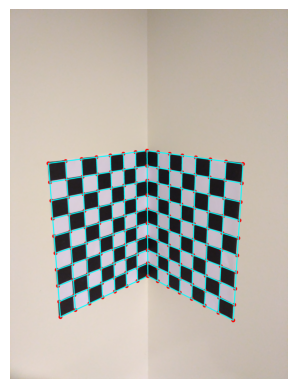

In [10]:
left_plane_world_coords, right_plane_world_coords = generate_world_points(exp_flag)
left_plane_uv_coords, right_plane_uv_coords = new_img_points(left_plane_world_coords, right_plane_world_coords, P)
plot_wireframe(left_plane_uv_coords, right_plane_uv_coords, '../images/Section-1/calib-object.jpg', exp_flag)

---

### (Experiment-1): Assume scale of each chessblock = 28mmx28mm and use all the 20 (or more) points which you have marked <br /> (Experiment-2): Assume scale of each chessblock = 2800mmx2800mm and use all the 20 (or more) points which you have marked <br /> (Experiment-3): Assume scale of each chessblock = 28mmx56mm and use all the 20 (or more) points which you have marked <br /> (Experiment-4): Assume scale of each chessblock = 28mmx28mm and use only 10 points out of the 20 (or more) which you have marked (Make sure that all these 10 points do not lie on the same plane) <br /> (Experiment-5): Assume scale of each chessblock = 28mmx28mm and use only 6 points out of the 20 (or more) which you have marked (Make sure that all these 6 points do not lie on the same plane) <br /> (Experiment-6): Assume scale of each chessblock = 28mmx28mm and use only 10 points out of the 20 (or more) which you have marked, and choose points such that all these 10 points lie on the same plane

In [11]:
def Task_A_B_C_D(exp_flag):
    P, P_err = Estimate_P_and_Error(exp_flag)
    K, R, C = camera_params(P)
    left_plane_world_coords, right_plane_world_coords = generate_world_points(exp_flag)
    left_plane_uv_coords, right_plane_uv_coords = new_img_points(left_plane_world_coords, right_plane_world_coords, P)
    plot_wireframe(left_plane_uv_coords, right_plane_uv_coords, '../images/Section-1/calib-object.jpg', exp_flag)

Projection Matrix
[[ 2.47168687e+00 -6.43058366e-01 -6.11175860e+00  1.53844102e+03]
 [-1.25276513e+00 -6.76794880e+00 -1.14117803e+00  1.59321070e+03]
 [-1.15505816e-03 -3.91089216e-04 -1.07533294e-03  1.00000000e+00]]
----------
Reprojection Error
3.046840857340288
----------
K: 
 [[6.51803231e+00 1.17965770e+00 3.96872646e-03]
 [0.00000000e+00 6.97687684e+00 5.32103471e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
----------
R: 
 [[ 4.11705425e-01  7.69058417e-02 -9.08066029e-01]
 [-1.79558707e-01 -9.70053919e-01 -1.63564921e-01]
 [-1.15505816e-03 -3.91089216e-04 -1.07533294e-03]]
----------
C: 
 (0.003968726457509208, 0.005321034706518036)
----------


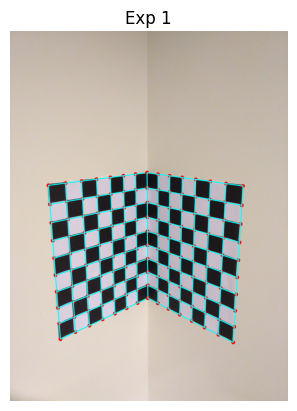

In [12]:
# Experiment 1
exp_flag = 1
Task_A_B_C_D(exp_flag)

Projection Matrix
[[ 2.47168668e-02 -6.43058225e-03 -6.11175863e-02  1.53844102e+03]
 [-1.25276544e-02 -6.76794841e-02 -1.14117829e-02  1.59321073e+03]
 [-1.15505822e-05 -3.91089121e-06 -1.07533301e-05  1.00000000e+00]]
----------
Reprojection Error
3.046841093014586
----------
K: 
 [[6.51803296e-02 1.17966042e-02 3.96872687e-07]
 [0.00000000e+00 6.97687859e-02 5.32103471e-07]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
----------
R: 
 [[ 4.11704885e-01  7.69060219e-02 -9.08066380e-01]
 [-1.79559587e-01 -9.70053918e-01 -1.63565737e-01]
 [-1.15505822e-05 -3.91089121e-06 -1.07533301e-05]]
----------
C: 
 (3.968726870090713e-07, 5.321034710615606e-07)
----------


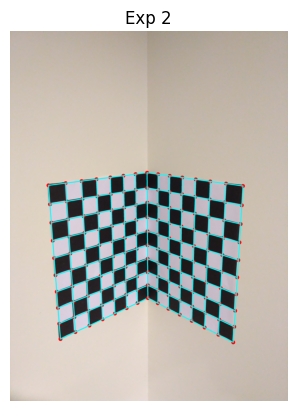

In [13]:
# Experiment 2
exp_flag = 2
Task_A_B_C_D(exp_flag)

Projection Matrix
[[ 2.47168668e+00 -3.21529129e-01 -6.11175864e+00  1.53844102e+03]
 [-1.25276538e+00 -3.38397425e+00 -1.14117828e+00  1.59321072e+03]
 [-1.15505823e-03 -1.95544574e-04 -1.07533301e-03  1.00000000e+00]]
----------
Reprojection Error
3.046840919974408
----------
K: 
 [[6.46871468e+00 1.31222167e+00 3.78010707e-03]
 [0.00000000e+00 3.78457125e+00 3.33588145e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
----------
R: 
 [[ 4.49248466e-01  1.31679071e-01 -8.83649407e-01]
 [-3.31018086e-01 -8.94149791e-01 -3.01533416e-01]
 [-1.15505823e-03 -1.95544574e-04 -1.07533301e-03]]
----------
C: 
 (0.003780107074839793, 0.0033358814539319217)
----------


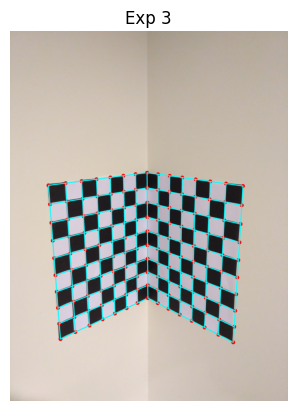

In [14]:
# Experiment 3
exp_flag = 3
Task_A_B_C_D(exp_flag)

Projection Matrix
[[ 3.03863487e+00 -1.58394413e-01 -6.23776820e+00  1.54612030e+03]
 [-2.57768749e-01 -5.91570750e+00 -1.62156384e+00  1.61468607e+03]
 [-7.60968083e-04 -1.16750666e-04 -1.28652411e-03  1.00000000e+00]]
----------
Reprojection Error
2.2186103171956053
----------
K: 
 [[6.73576372e+00 1.67260187e+00 5.73122766e-03]
 [0.00000000e+00 6.13934039e+00 2.97299755e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
----------
R: 
 [[ 4.61546049e-01  2.15756007e-01 -8.60478969e-01]
 [-4.19860230e-02 -9.63573736e-01 -2.64126097e-01]
 [-7.60968083e-04 -1.16750666e-04 -1.28652411e-03]]
----------
C: 
 (0.005731227657599047, 0.002972997549435863)
----------


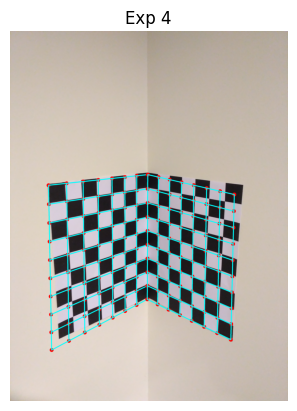

In [15]:
# Experiment 4
exp_flag = 4
Task_A_B_C_D(exp_flag)

Projection Matrix
[[ 9.00435953e+00  8.21597156e+00 -7.99736141e+00  1.55543999e+03]
 [ 1.43359117e+01  1.29120015e+01 -1.26782826e+01  2.43680051e+03]
 [ 5.09801565e-03  5.27376058e-03 -5.24354582e-03  1.00000000e+00]]
----------
Reprojection Error
1.1731037229659806
----------
K: 
 [[ 0.07942257 14.57789271  0.13116796]
 [ 0.         23.08536063  0.20765866]
 [ 0.          0.          1.        ]]
----------
R: 
 [[-0.6100362   0.78477798  0.10944932]
 [ 0.62094993  0.55926813 -0.54914428]
 [ 0.00509802  0.00527376 -0.00524355]]
----------
C: 
 (0.13116796369270767, 0.20765866249921097)
----------


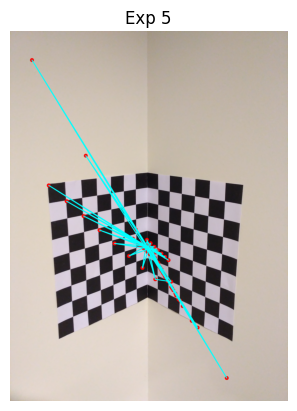

In [16]:
# Experiment 5
exp_flag = 5
Task_A_B_C_D(exp_flag)

In [17]:
exp_flag = 6
Task_A_B_C_D(exp_flag)

/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/2542124559.py:57: RuntimeWarning: divide by zero encountered in divide
  P = V[-1, :] / V[-1, -1] # normalize
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/2542124559.py:57: RuntimeWarning: invalid value encountered in divide
  P = V[-1, :] / V[-1, -1] # normalize
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1744396781.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  numr = P[0][0]*left_plane_world_coords[i][0] + P[0][1]*left_plane_world_coords[i][1] + P[0][2]*left_plane_world_coords[i][2] + P[0][3]
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1744396781.py:30: RuntimeWarning: invalid value encountered in scalar multiply
  numr = P[0][0]*right_plane_world_coords[i][0] + P[0][1]*right_plane_world_coords[i][1] + P[0][2]*right_plane_world_coords[i][2] + P[0][3]


Projection Matrix
[[inf nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
----------
Reprojection Error
nan
----------
K: 
 [[nan nan nan]
 [ 0. nan nan]
 [ 0.  0.  1.]]
----------
R: 
 [[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
----------
C: 
 (nan, nan)
----------
This value is:  [nan nan]
The code ends in an error because all points are in the same plane!


ValueError: cannot convert float NaN to integer

----

#### **Observations**:


<img src="https://i.ibb.co/T1qRMxP/Screenshot-2023-01-31-at-7-02-17-PM.png" alt="drawing" width="800"/>

#### In Exp 1 and Exp 2, as we can observe that though the error is similar but the elements in the M part of the projection matrix (3x3) is differing by a sale of 100, that is because in Exp 2, the scale is differing from Exp 1 by the scale of 100.

#### In Exp 3, the length and width of chessblock differs and that can be inferred as the pixels are not square. This difference in length and width is also reflected in the K matrix. The K[0][0] also known as effective focal length along x-axis is 6.46 and K[1][1] also known as effective focal length along y-axis is 3.78. These elements have similar values in other experiments where the width of chessblock = height of chessblock.

#### In experiment number 4, the reprojection error has seemed to decrease, however, if we observe the corresponding wireframe of Exp 4, we se that, it is less accurate compared to the wireframes of Exp 1, 2, 3. Similarly, Exp 5 seems to have reduced the error further but its wireframe is totally disoriented.

#### Why?

#### As we know that our Projection matrix has 11 degree of freedom and thus only 6 points will be enough to solve it as each point gives us 2 equations. But 6 points will be enough in ideal settings, however in real world settings due to the introduction of noise, this many points might not be sufficient as even a small noise can disorient the image points by a large margin. <br /> This exactly is the case of Exp 4 and Exp 5, where it seems like the error is decreasing but these points are not sufficient to project on an image plane. Hence, more points can improve the results, as observed in Exp 1,2 and 3.

#### Why experiment 6 fails?

#### All the points are chosen on a single plane in experiment 6. This coplanarity results in making elements of Projection matrix (P) as 'NaN'. This causes a problem when we try to multiply the elements of P with the world points to get the corresponding 2D projection. This shows that it might not be feasible to try to project coplanar points to 2D.

---
---

## Task 2: RANSAC

### 2. Implement a RANSAC-based variant of DLT and report results for Experiment-1 mentioned in the first section

In [154]:
# From the last part (where we calculated P), we have defined image and world coordinates.
# We will use the same coordinates here to see how much P has improved because of RANSAC

d1, d2 = 1, 1
xyz = [[0,0,7*d1,1], [0,-1*d2,6*d1,1], [0,-2*d2,5*d1,1], [0,-3*d2,4*d1,1], [0,-4*d2,3*d1,1], [0,-5*d2,2*d1,1], [0,-6*d2,1*d1,1], [0,-7*d2,2*d1,1], [0,-8*d2,3*d1,1], [0,-9*d2,4*d1,1], [7*d1,0,0,1], [6*d1,-1*d2,0,1], [5*d1,-2*d2,0,1], [4*d1,-3*d2,0,1], [3*d1,-4*d2,0,1], [2*d1,-5*d2,0,1], [1*d1,-6*d2,0,1], [2*d1,-7*d2,0,1], [3*d1,-8*d2,0,1], [4*d1,-9*d2,0,1]]
uv = [[435,1735,1], [634,1915,1], [826,2080,1], [994,2228,1], [1151,2367,1], [1294,2492,1], [1426,2605,1], [1302,2812,1], [1167,3024,1], [1041,3240,1], [2618,1742,1], [2414,1927,1], [2230,2087,1], [2063,2238,1], [1923,2373,1], [1786,2494,1], [1658,2606,1], [1784,2815,1], [1910,3032,1], [2039,3259,1]]

image_pts = np.asarray(uv)
world_pts = np.asarray(xyz)

In [155]:
### Finding Projection Matrix using DLT
def projection_matrix_estimation(img_pts, world_pts):
    n = world_pts.shape[0]
    A =  np.zeros((2*n,12))
    for i in range(n):
        A[i*2,0:4] = -1 * world_pts[i,:]
        A[i*2,8:12] = img_pts[i,0]*world_pts[i,:]
        A[i*2+1,4:8] = -1 * world_pts[i,:]
        A[i*2+1,8:12] = img_pts[i,1]*world_pts[i,:]
    
    U, D, V = np.linalg.svd(A)
    P = V[11,:]
    P = (np.reshape(P,(3,4)))
    ### P is the projection matrix
    P = P/P[2,3]
    return P

In [156]:
### Reprojection Error for RANSAC
def reprojection_error(P,I_pts,W_pts):
    param = 10
    inliers = 0
    n = I_pts.shape[0]
    for i in range(n):
        projected_points = np.matmul(P,np.transpose(W_pts[i,:]))
        projected_points = projected_points/projected_points[2]
        error = np.abs(projected_points[0] - I_pts[i,0]) + np.abs(projected_points[1] - I_pts[i,1])
        if (error < param):
            inliers = inliers + 1
    return inliers, error

In [157]:
import random
### RANSAC Algorithm for 6 Points
def RANSAC(img_points,world_points):
    N = 20000
    n = img_points.shape[0]
    I_pts = np.zeros((6,3))
    W_pts = np.zeros((6,4))
    I_rep = np.zeros((n-6,3))
    W_rep = np.zeros((n-6,4))
    current_best_inliers = 0
    best_projection_matrix = []
    for i in range(N):
        p = 0
        q = 0
        l  = random.sample(range(n),6)
        for j in range(n):
            if j in l:
                I_pts[q,:] = img_points[j,:]
                W_pts[q,:] = world_points[j,:]
                q = q + 1
            else:
                I_rep[p,:] = img_points[j,:]
                W_rep[p,:] = world_points[j,:]
                p = p + 1
        if (((np.sum(W_pts,axis=1))[1] == 0) or ((np.sum(W_pts,axis=1))[2] == 0)):
            continue
        P = projection_matrix_estimation(I_pts, W_pts)
        inl, err = reprojection_error(P,I_rep,W_rep)
        if (inl > current_best_inliers):
            best_projection_matrix =  P.copy()
            current_best_inliers = inl
    return best_projection_matrix, err

In [158]:
### Estimating P matrix with RANSAC Algorithm
P_best, err = RANSAC(image_pts,world_pts)
print('Projection Matrix after RANSAC is:')
print(P_best)
print("-"*10)
print("Error")
print(err)
print("-"*10)

/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1014167303.py:15: RuntimeWarning: divide by zero encountered in divide
  P = P/P[2,3]
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1014167303.py:15: RuntimeWarning: invalid value encountered in divide
  P = P/P[2,3]
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1431680024.py:7: RuntimeWarning: invalid value encountered in matmul
  projected_points = np.matmul(P,np.transpose(W_pts[i,:]))
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1431680024.py:8: RuntimeWarning: divide by zero encountered in divide
  projected_points = projected_points/projected_points[2]
/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/1431680024.py:8: RuntimeWarning: invalid value encountered in divide
  projected_points = projected_points/projected_points[2]


Projection Matrix after RANSAC is:
[[ 7.22935620e+01 -1.95525368e+01 -1.70556075e+02  1.54216168e+03]
 [-3.14897835e+01 -1.94553878e+02 -2.75757757e+01  1.58330103e+03]
 [-3.10910165e-02 -1.20903824e-02 -2.84392332e-02  1.00000000e+00]]
----------
Error
1822.0222485467789
----------


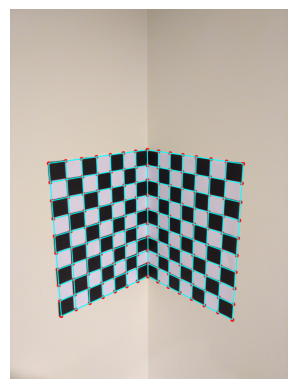

In [159]:
exp_flag = 7
left_plane_world_coords, right_plane_world_coords = generate_world_points(exp_flag)
left_plane_uv_coords, right_plane_uv_coords = new_img_points(left_plane_world_coords, right_plane_world_coords, P_best)
plot_wireframe(left_plane_uv_coords, right_plane_uv_coords, '../images/Section-1/calib-object.jpg', exp_flag)

---
---

## Task 3: Triangulation

### Perform DLT on both images of the cube: “cube-01.jpg” and “cube-02.jpg” to get projection matrices for the two cameras. <br /> - Consider the image coordinates of a world point used for DLT in both images. <br /> - Triangulate these two image coordinates to find the 3D coordinate of the world point. <br /> - Calculate the euclidean error between the predicted world coordinate and the original world point.

1. The markings for both "cube-01.jpg" and "cube-02.jpg" has been demonstarted by Yellow points:

![alt](https://i.ibb.co/xDGDPgb/Screenshot-2023-01-31-at-10-03-48-PM.png)

In [136]:
''' cube-01.jpg '''
uv_1 = [[1391,1249], [1648,1350], [1968,1456], [2304,1567], [2534,1415], [2723,1272], [2848,1165], [1411,1563], [1655,1660], [1945,1778], [2294,1910], [2531,1747], [2703,1587], [2816,1476], [1432,1860], [1662,1965], [1983,2104], [2283,2233], [2504,2037], [2648,1896], [2773,1752], [1641,1125], [1892,1207], [2158,1294], [1865,1025], [2093,1100], [2373,1170]]

''' cube-02.jpg '''
uv_2 = [[1198,1139], [1320,1223], [1492,1345], [1689,1482], [2026,1386], [2355,1291], [2613,1217], [1226,1438], [1347,1545], [1504,1687], [1703,1849], [2071,1733], [2350,1631], [2586,1523], [1264,1735], [1372,1829], [1526,1978], [1731,2170], [2070,2038], [2363,1922], [2571,1829], [1503,1067], [1640,1146], [1792,1246], [1790,1012], [1944,1086], [2114,1170]]

''' same world coordinates '''
xyz = [[0,0,3], [0,0,2], [0,0,1], [0,0,0], [1,0,0], [2,0,0], [3,0,0], [0,-1,3], [0,-1,2], [0,-1,1], [0,-1,0], [1,-1,0], [2,-1,0], [3,-1,0], [0,-2,3], [0,-2,2], [0,-2,1], [0,-2,0], [1,-2,0], [2,-2,0], [3,-2,0], [1,0,3], [1,0,2], [1,0,1], [2,0,3], [2,0,2], [2,0,1]]

# Convert variables to numpy array
xyz = np.asarray(xyz)
uv_1 = np.asarray(uv_1)
uv_2 = np.asarray(uv_2)

In [137]:
# Step 3. Estimate P using DLT.

def Estimate_P_and_Error(xyz,uv):
    '''
    Camera calibration by DLT using pre-computed world coordinates and their 2D image coordinates.
    returns: P (array of 11 parameters of the calibration matrix), P_err: error of the DLT (mean residual of the DLT transformation in units of camera coordinates).
    '''

    n = xyz.shape[0]

    proj_eq = []
    for i in range(n):
        x, y, z = xyz[i, 0], xyz[i, 1], xyz[i, 2]
        u, v = uv[i, 0], uv[i, 1]
        proj_eq.append( [x, y, z, 1, 0, 0, 0, 0, -u * x, -u * y, -u * z, -u] )
        proj_eq.append( [0, 0, 0, 0, x, y, z, 1, -v * x, -v * y, -v * z, -v] )
    
    proj_eq = np.asarray(proj_eq)
    
    U, S, V = np.linalg.svd(proj_eq) # Find the 11 parameters
    P = V[-1, :] / V[-1, -1] # normalize
    P = P.reshape(3, 3 + 1)

    # Mean error of the DLT (mean residual of the DLT transformation in units of camera coordinates):
    uv2 = np.dot( P, np.concatenate( (xyz.T, np.ones((1, xyz.shape[0]))) ) ) 
    uv2 = uv2 / uv2[2, :] 
    # Mean distance:
    err = np.sqrt( np.mean(np.sum( (uv2[0:2, :].T - uv)**2, 1)) ) 

    return P, err    

In [138]:
# P: Projection Matrix
# P_err: Reprojection Error
P1, P1_err = Estimate_P_and_Error(xyz, uv_1)
P2, P2_err = Estimate_P_and_Error(xyz, uv_2)

print("Projection Matrix P1\n", P1)
print("P1 Error", P1_err)
print("-"*10)
print("Projection Matrix P2\n", P2)
print("P2 Error", P2_err)
print("-"*10)

Projection Matrix P1
 [[ 4.45186098e+02 -1.00115764e+02 -2.21548560e+02  2.31313198e+03]
 [-2.55478049e+01 -4.57458969e+02 -2.73022083e+01  1.56018803e+03]
 [ 9.23228726e-02 -5.02329948e-02  6.44224193e-02  1.00000000e+00]]
P1 Error 19.093581126869786
----------
Projection Matrix P2
 [[ 5.07363048e+02 -9.93405312e+01 -5.55578855e+01  1.67868070e+03]
 [ 3.65288667e+00 -4.48235091e+02 -1.29441113e+01  1.47586357e+03]
 [ 7.47232372e-02 -4.39912231e-02  9.14401752e-02  1.00000000e+00]]
P2 Error 17.948222323259472
----------


In [153]:
# Calculate A matrix
# AX=0

n = xyz.shape[0]
X = []
for i in range(n):
    A = []
    # A.append(np.dot(uv_1[i][1], P1[2].transpose()) - P1[1].transpose())
    # A.append(P1[0].transpose() - np.dot(uv_1[i][0], P1[2].transpose()))

    # A.append(np.dot(uv_2[i][1], P2[2].transpose()) - P2[1].transpose())
    # A.append(P2[0].transpose() - np.dot(uv_1[i][0], P2[2].transpose()))

    A.append(np.dot(uv_1[i][1], P1[2]) - P1[1])
    A.append(P1[0] - np.dot(uv_1[i][0], P1[2]))

    A.append(np.dot(uv_2[i][1], P2[2]) - P2[1])
    A.append(P2[0] - np.dot(uv_2[i][0], P2[2]))

    A = np.asarray(A)
    b = A[:, -1].copy()

    x = np.linalg.lstsq(A[:, :-1], -b)[0]
    # x /= np.linalg.norm(x)
    print(x)
    print(xyz[i])
    print("----")


[ 0.02960481 -0.04110897  2.99770509]
[0 0 3]
----
[-0.0162509  -0.018494    2.01363879]
[0 0 2]
----
[ 0.00457541 -0.02771662  0.99318358]
[0 0 1]
----
[ 0.05307033 -0.05644984  0.05540471]
[0 0 0]
----
[ 0.93673613  0.01332929 -0.05869656]
[1 0 0]
----
[ 1.99495604  0.02067941 -0.05651506]
[2 0 0]
----
[ 3.03317067 -0.02987741  0.04093653]
[3 0 0]
----
[ 0.00515161 -1.02162634  2.98824705]
[ 0 -1  3]
----
[-0.01434622 -1.00036932  2.04479172]
[ 0 -1  2]
----
[-0.0028954  -1.02103076  1.06694609]
[ 0 -1  1]
----
[ 0.01506504 -1.00887702  0.02061633]
[ 0 -1  0]
----
[ 1.04644967 -1.01365804 -0.06206614]
[ 1 -1  0]
----
[ 1.9573588  -0.95488363 -0.10248834]
[ 2 -1  0]
----
[ 2.9196249  -0.98697917 -0.00889583]
[ 3 -1  0]
----
[ 0.03387376 -2.08652454  3.0297566 ]
[ 0 -2  3]
----
[-0.03397754 -1.97005203  2.05017324]
[ 0 -2  2]
----
[-0.12017145 -1.83390149  0.8563255 ]
[ 0 -2  1]
----
[ 0.03076099 -1.98794383  0.02284817]
[ 0 -2  0]
----
[ 1.02908932 -1.95104264 -0.0538116 ]
[ 1 -2  0]


/var/folders/jc/33x9x29n3sd6wvf98brkm9hh0000gn/T/ipykernel_16700/758683020.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A[:, :-1], -b)[0]


---
---

## Task 4: Image Stitching

### 1. Extract features and perform feature matching between two overlapping images.<br />2. Estimate the homography matrix between them<br />3. Transform one of the images to the other reference frame using the homography matrix<br />4. Stitch the two images together<br />5. Repeat the same procedure to create a single panorama in case there are more than two images.

In [105]:
# To combine multiple images into the same perspective, the following operations are needed:
# Detect and match features. <br />
# Compute homography (perspective transform between frames). <br />
# Warp one image onto the other perspective. <br />
# Combine the base and warped images while keeping track of the shift in origin. <br />
# Given the combination pattern, stitch multiple images <br />

# Initiate SIFT detector
def feature_descriptor(img1, img2):
   descriptor = cv2.SIFT.create()

   # detect and compute the keypoints and descriptors with SIFT
   (prim_image_keypoints, base_image_descriptors) = descriptor.detectAndCompute(img1, mask=None)
   (sec_image_keypoints, sec_image_descriptors) = descriptor.detectAndCompute(img2, mask=None)

   BF_Matcher = cv2.BFMatcher()
   InitialMatches = BF_Matcher.knnMatch(base_image_descriptors, sec_image_descriptors, k=2)

   # Apply ratio test
   GoodMatches = []
   for m,n in InitialMatches:
      if m.distance < 0.75*n.distance:
         GoodMatches.append([m])

   return prim_image_keypoints, base_image_descriptors, sec_image_keypoints, sec_image_descriptors, GoodMatches

In [106]:
# Finding Homography
def keypoints(prim_image_keypoints, base_image_descriptors, sec_image_keypoints, sec_image_descriptors, GoodMatches):
    if len(GoodMatches) < 4:
        print("\nNot enough matches found between theimages.\n")
        exit(0)

    # Storing coordinates of points corresponding to the matches found
    # in both the images
    BaseImage_pts = []
    SecImage_pts = []

    for Match in GoodMatches:
        BaseImage_pts.append(prim_image_keypoints[Match[0].queryIdx].pt)
        SecImage_pts.append(sec_image_keypoints[Match[0].trainIdx].pt)
        
    # Changing the datatype to "float32" for finding homography
    BaseImage_pts = np.float32(BaseImage_pts)
    SecImage_pts = np.float32(SecImage_pts)

    return SecImage_pts, BaseImage_pts    

In [119]:
# Finding the homography matrix(transformation matrix).
def stitch(SecImage_pts, BaseImage_pts, img1, img2, img1_bgr, img2_bgr):    
    (HomographyMatrix, Status) = cv2.findHomography(SecImage_pts, BaseImage_pts, cv2.RANSAC, 4.0)
    # Reading the size of the image
    (Height, Width) = img2.shape
    # Taking the matrix of initial coordinates of the corners of the
    # secondary image
    # Stored in the following format:
    # [[x1, x2, x3, x4], [y1, y2, y3, y4], [1, 1, 1, 1]]
    # Where (xi, yi) is the coordinate of the i th corner of the image.
    InitialMatrix = np.array([[0, Width - 1, Width - 1, 0],
                            [0, 0, Height - 1, Height - 1],
    [1, 1, 1, 1]])
    # Finding the final coordinates (xi, yi) of the corners of the
    # image after transformation.
    FinalMatrix = np.dot(HomographyMatrix, InitialMatrix)
    [x, y, c] = FinalMatrix
    x = np.divide(x, c)
    y = np.divide(y, c)

    # Finding the dimentions of the stitched image frame and the
    # "Correction" factor
    min_x, max_x = int(round(min(x))), int(round(max(x)))
    min_y, max_y = int(round(min(y))), int(round(max(y)))
    New_Width = max_x
    New_Height = max_y
    Correction = [0, 0]
    if min_x < 0:
        New_Width -= min_x
        Correction[0] = abs(min_x)
    if min_y < 0:
        New_Height -= min_y
        Correction[1] = abs(min_y)
    # Again correcting New_Width and New_Height
    # Helpful when secondary image is overlaped on the left hand side
    # of the Base image.
    if New_Width < img1.shape[1] + Correction[0]:
        New_Width = img1.shape[1] + Correction[0]
    if New_Height < img1.shape[0] + Correction[1]:
        New_Height = img1.shape[0] + Correction[1]

    # Finding the coordinates of the corners of the image if they all
    # were within the frame.
    x = np.add(x, Correction[0])
    y = np.add(y, Correction[1])
    OldInitialPoints = np.float32([[0, 0], [Width - 1, 0], [Width - 1, Height - 1], [0, Height - 1]])
    NewFinalPonts = np.float32(np.array([x, y]).transpose())

    HomographyMatrix = cv2.getPerspectiveTransform(OldInitialPoints, NewFinalPonts)

    # Finally placing the images upon one another.
    StitchedImage_bgr = cv2.warpPerspective(img2_bgr, HomographyMatrix, (New_Width, New_Height), borderMode=cv2.BORDER_REFLECT101)
    StitchedImage_bgr[Correction[1]:Correction[1]+ img1_bgr.shape[0], Correction[0]:Correction[0]+ img1_bgr.shape[1]] = img1_bgr

    return StitchedImage_bgr

In [120]:
def img_edge_correction(stitched_2_imgs, img1, img2):
    # removing black external edges and getting a rectangle
    _,thresh = cv2.threshold(stitched_2_imgs,1,255,cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    # correct_stitched_img = cv2.rectangle(stitched_2_imgs, (x,y), (x+w, y+h), (255,0,0), 50)
    y_ = int(y + ((stitched_2_imgs.shape[0]-img1.shape[0])/2))
    y_h = int(y+h - ((stitched_2_imgs.shape[0]-img1.shape[0])/2))

    # correct_stitched_img = stitched_2_imgs[y+50:y+h-50, x:x+w-100]  
    correct_stitched_img = stitched_2_imgs[y_:y_h, x:x+w-50]  
    # plt.imshow(stitched_2_imgs), plt.show()
    plt.imshow(correct_stitched_img), plt.show()
    return correct_stitched_img

In [121]:
def all_operations(img1_bgr, img2_bgr, img1, img2):
    prim_image_keypoints, base_image_descriptors, sec_image_keypoints, sec_image_descriptors, GoodMatches = feature_descriptor(img1, img2)
    SecImage_pts, BaseImage_pts = keypoints(prim_image_keypoints, base_image_descriptors, sec_image_keypoints, sec_image_descriptors, GoodMatches)
    stitched_2_imgs_bgr = stitch(SecImage_pts, BaseImage_pts, img1, img2, img1_bgr, img2_bgr)
    # plt.imshow(stitched_2_imgs_bgr), plt.show()
    # cv2.cvtColor(stitched_2_imgs, cv2.COLOR_GRAY2BGR)
    # cv2.imwrite("see.jpg", stitched_2_imgs)
    return stitched_2_imgs_bgr

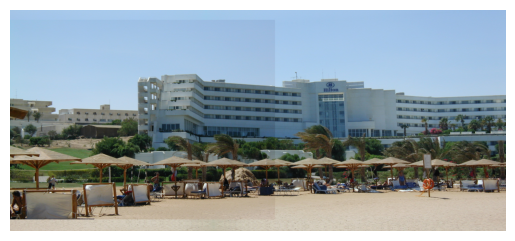

In [122]:
# convert two input images as grayscale
img1_bgr = cv2.imread('../images/Section-4/building/1.jpg')
img2_bgr = cv2.imread('../images/Section-4/building/2.jpg')
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)
stitched_2_imgs_bgr = all_operations(img1_bgr, img2_bgr, img1, img2)
stitched_2_imgs_rgb = cv2.cvtColor(stitched_2_imgs_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(stitched_2_imgs_rgb)
plt.axis('off')
plt.show()
# correct_stitched_img_bgr = img_edge_correction(stitched_2_imgs_bgr, img1, img2)

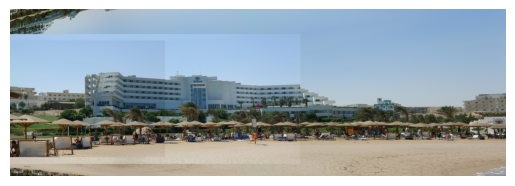

In [123]:
# convert input images as grayscale
img1_bgr = stitched_2_imgs_bgr
img2_bgr = cv2.imread('../images/Section-4/building/3.jpg')
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)
stitched_2_imgs = all_operations(img1_bgr, img2_bgr, img1, img2)
stitched_2_imgs_rgb = cv2.cvtColor(stitched_2_imgs, cv2.COLOR_BGR2RGB)
plt.imshow(stitched_2_imgs_rgb)
plt.axis('off')
plt.show()
# correct_stitched_img = img_edge_correction(stitched_2_imgs, img1, img2)

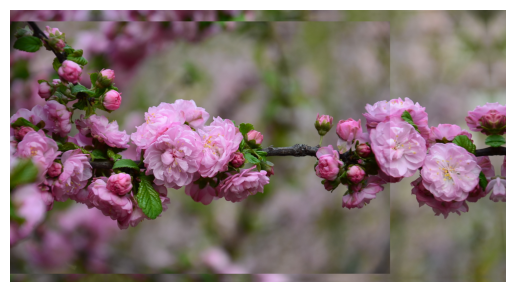

In [124]:
# convert input images as grayscale
img1_bgr = cv2.imread('../images/Section-4/flower/1.jpg')
img2_bgr = cv2.imread('../images/Section-4/flower/2.jpg')
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)
stitched_2_imgs_bgr = all_operations(img1_bgr, img2_bgr, img1, img2)
stitched_2_imgs_rgb = cv2.cvtColor(stitched_2_imgs_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(stitched_2_imgs_rgb)
plt.axis('off')
plt.show()
# correct_stitched_img_bgr = img_edge_correction(stitched_2_imgs_bgr, img1, img2)

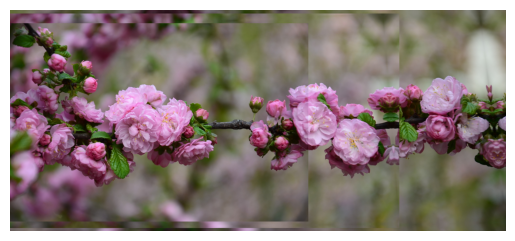

In [126]:
# read two input images as grayscale
img1_bgr = stitched_2_imgs_bgr
img2_bgr = cv2.imread('../images/Section-4/flower/3.jpg')
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)
stitched_2_imgs = all_operations(img1_bgr, img2_bgr, img1, img2)
stitched_2_imgs_rgb = cv2.cvtColor(stitched_2_imgs, cv2.COLOR_BGR2RGB)
plt.imshow(stitched_2_imgs_rgb)
plt.axis('off')
plt.show()
# correct_stitched_img = img_edge_correction(stitched_2_imgs, img1, img2)

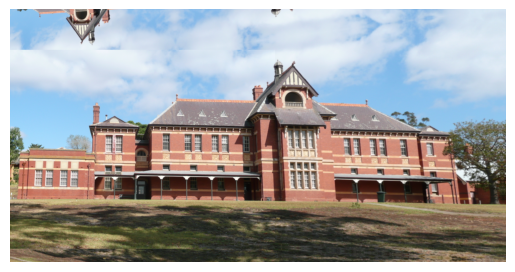

In [127]:
# convert two input images as grayscale
img1_bgr = cv2.imread('../images/Section-4/school/1.jpg')
img2_bgr = cv2.imread('../images/Section-4/school/2.jpg')
img1 = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2GRAY) 
img2 = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2GRAY)
stitched_2_imgs_bgr = all_operations(img1_bgr, img2_bgr, img1, img2)
stitched_2_imgs_rgb = cv2.cvtColor(stitched_2_imgs_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(stitched_2_imgs_rgb)
plt.axis('off')
plt.show()
# correct_stitched_img_bgr = img_edge_correction(stitched_2_imgs_bgr, img1, img2)